# We found the original tiff and thresholded it, now checking the area




**Date** August 2022

Import some useful modules

In [4]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
#from datacube.storage import masking
import os
#sys.path.append('../Scripts/')
#import dea_spatialtools
import pandas as pd
import numpy as np


In [5]:
import sys
sys.path.insert(1, '../Tools/')
import dea_tools.datahandling
from datacube.utils import masking
import dea_tools.spatial #hopefully this replaces dea_spatialtools

In [6]:
from datacube.utils.cog import write_cog

## Load in what we think the original file was

In [7]:
# Open the GeoTIFFs using rasterio

In [26]:
#jun28img = '/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/Mac_14_-35_20160627__20160629_clipped.tif'
jun28img = '/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/2022/2022t-300_Mac_14_-35_20160627__20160629_clipped.tif'

In [27]:
jun28 = xr.open_rasterio(jun28img)

### OK, we need to remove nodata values (-3.4028234663852886e+38 I think)

In [33]:

jun28 = jun28.where(jun28!=-3.4028234663852886e+38)

In [37]:
jun28 = jun28.squeeze()
jun28

<xarray.DataArray (y: 6563, x: 2144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band     int64 1
  * y        (y) float64 -3.383e+06 -3.383e+06 ... -3.547e+06 -3.547e+06
  * x        (x) float64 1.438e+06 1.438e+06 1.438e+06 ... 1.492e+06 1.492e+06
Attributes:
    transform:      (25.0, 0.0, 1438425.0, 0.0, -25.0, -3382800.0)
    crs:            +init=epsg:3577
    res:            (25.0, 25.0)
    is_tiled:       0
    nodatavals:     (-3.4028234663852886e+38,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

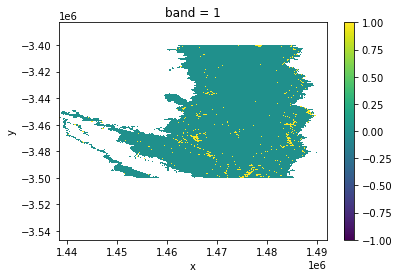

In [41]:
#this band should be mean wetness (band 6)
jun28.plot.imshow(cmap='viridis', vmin=-1,vmax=1)
plt.show()

In [43]:
jun28.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [44]:
jun28Count = jun28.count()

jun28area=np.round((jun28Count*25*25)/(1000*1000),2)
print(jun28area.values,'km^2')

2750.8 km^2


In [44]:
wet_350 = jun28[5].where(jun28[5]>=-350)
wet_350 = wet_350.where(wet_350!=-1) #I don't know why this nodata value is here, it's an issue. May need to clip the data

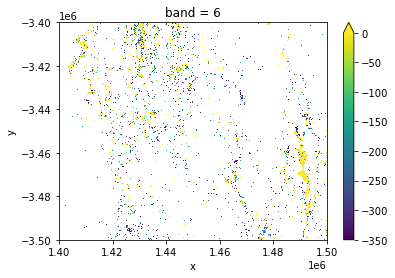

In [45]:
wet_350.plot.imshow(cmap='viridis', vmin=-350,vmax=0)
plt.show()

In [46]:
wet_350count=wet_350.where(wet_350).count()

In [51]:
print(wet_350count.data)
wet_350area=np.round((wet_350count*25*25)/(1000*1000),2)
print('AREA IS', wet_350area.data)

796311
AREA IS 497.69


In [55]:
jun28[5].size

16000000

In [12]:
#write this out as a cog
#write_cog(cewo_fix2, fname='/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_2022b.tif')